In [1]:
#导入相关包
import numpy as np
import matplotlib.pyplot as plt
import random
import netCDF4
import datetime
import seaborn as sns
from global_land_mask import globe
from scipy import interpolate
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
#plt.rcParams['font.sans-serif'] = ['SimHei'] #中文支持
#%matplotlib inline

/mnt/miniconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#cor评价指标
def cor_caluate(Y_test,t_preds,index):
    cor_day = []
    a=0
    b=0
    c=0
    for i in range(0,index):
        for j in range(0,len(Y_test)):
            a+=(Y_test[j,i,:]*t_preds[j,i,:]).sum()
            b+=(Y_test[j,i]**2).sum()
            c+=(t_preds[j,i]**2).sum()
        b=np.sqrt(b)
        c=np.sqrt(c)
        cor=a/(b*c)
        cor_day.append(cor)
        a=0
        b=0
        c=0
    cor_day=np.array(cor_day)
    print(cor_day)
    return cor_day

In [3]:
#画cor指标
def cor_acc(cor_day):
    # 绘制损失函数曲线
    fig = plt.figure(figsize=(8,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(cor_day, label='cor_acc')
    ax1.set_xlabel('days')
    ax1.set_ylabel('cor')
    ax1.set_title('MJO Bivariate Correlation')
    ax1.legend()
    ax1.axhline(y=0.5,color='red',linewidth=0.85)
    plt.tight_layout()

In [4]:
#rmse评价指标
def rmse_caluate(Y_test,t_preds,index):
    rmse_day = []
    a=0
    for i in range(0,index):
        for j in range(0,len(Y_test)):
            a+=((Y_test[j,i,:]-t_preds[j,i,:])**2).sum()
        rmse=a/len(Y_test)
        rmse=np.sqrt(rmse)
        rmse_day.append(rmse)
        a=0
    rmse_day=np.array(rmse_day)
    print(rmse_day)
    return rmse_day

In [5]:
#画rmse指标
def rmse_acc(rmse_day):
    # 绘制损失函数曲线
    fig = plt.figure(figsize=(8,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(rmse_day, label='rmse_acc')
    ax1.set_xlabel('days')
    ax1.set_ylabel('rmse')
    ax1.set_title('MJO Bivariate Correlation')
    ax1.legend()
    ax1.axhline(y=1.4,color='red',linewidth=0.85)
    plt.tight_layout()

In [6]:
#读取文件名
ecmf_filename=np.loadtxt('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/ecmf_date_sort.txt')
ecmf_path='/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/s2s_RMM/ecmf/'
ecmf_re_path='/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/re_RMM/ecmf/'

In [30]:
# 划分春夏秋冬的rmm指数
def ecmf_create_data(filename,path,re_path):
    
    ec_data_spring = []
    ec_data_summer = []
    ec_data_autumn = []
    ec_data_winter = []
    
    re_data_spring = []
    re_data_summer = []
    re_data_autumn = []
    re_data_winter = []
    
    for i in range(0,len(filename)-9):
        #获得文件名
        str_name=str(int(filename[i]))
        #截取日期月份
        x = int(filename[i]) // 100
        month = x % 100
        
        s2s_data=np.load(path+str_name+'_ecmf_rmm.npy')
        re_data=np.load(re_path+str_name+'_ecmf_rmm.npy')
        print("month:", month)
        #判断季节
        if (month == 3 or month == 4 or month == 5):
            ec_data_spring.append(s2s_data)
            re_data_spring.append(re_data)
            print("get spring!")
        
        if (month == 6 or month == 7 or month == 8):
            ec_data_summer.append(s2s_data)
            re_data_summer.append(re_data)
            print("get summer!")
            
        if (month == 9 or month == 10 or month == 11):
            ec_data_autumn.append(s2s_data)
            re_data_autumn.append(re_data)
            print("get autumn!")
            
        if (month == 12 or month == 1 or month == 2):
            ec_data_winter.append(s2s_data)
            re_data_winter.append(re_data)
            print("get winter!")
            
    ec_data_spring = np.array(ec_data_spring)
    ec_data_summer = np.array(ec_data_summer)
    ec_data_autumn = np.array(ec_data_autumn)
    ec_data_winter = np.array(ec_data_winter)
    
    re_data_spring = np.array(re_data_spring)
    re_data_summer = np.array(re_data_summer)
    re_data_autumn = np.array(re_data_autumn)
    re_data_winter = np.array(re_data_winter)
    
    return ec_data_spring, ec_data_summer, ec_data_autumn, ec_data_winter, re_data_spring, re_data_summer, re_data_autumn, re_data_winter

In [31]:
ec_data_spring, ec_data_summer, ec_data_autumn, ec_data_winter, re_data_spring, re_data_summer, re_data_autumn, re_data_winter = ecmf_create_data(ecmf_filename, ecmf_path, ecmf_re_path)

month: 1
get winter!
month: 1
get winter!
month: 1
get winter!
month: 2
get winter!
month: 2
get winter!
month: 3
get spring!
month: 3
get spring!
month: 3
get spring!
month: 3
get spring!
month: 3
get spring!
month: 4
get spring!
month: 5
get spring!
month: 6
get summer!
month: 6
get summer!
month: 6
get summer!
month: 7
get summer!
month: 7
get summer!
month: 7
get summer!
month: 7
get summer!
month: 7
get summer!
month: 7
get summer!
month: 7
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month:

month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 1
get winter!
month: 1
get winter!
month: 1
get winter!
month: 2
get winter!
month: 2
get winter!
month: 3
get spring!
month: 3
get spring!
month: 3
get spring!
month: 3
get spring!
month: 3
get spring!
month: 4
get spring!
month: 5
get spring!
month: 6
get summer!
month: 6
get summer!
month: 6
get summer!
month: 7
get summer!
month: 7
get summer!
month: 7
get summer!
month: 7
get summer!
month: 7
get summer!
month: 7
get summer!
month: 7


month: 7
get summer!
month: 7
get summer!
month: 7
get summer!
month: 7
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 8
get summer!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 9
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 10
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 11
get autumn!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12
get winter!
month: 12


In [32]:
print(ec_data_spring.shape)
print(ec_data_summer.shape)
print(ec_data_autumn.shape)
print(ec_data_winter.shape)
print(re_data_spring.shape)
print(re_data_summer.shape)
print(re_data_autumn.shape)
print(re_data_winter.shape)

(147, 46, 2)
(399, 46, 2)
(525, 46, 2)
(285, 46, 2)
(147, 46, 2)
(399, 46, 2)
(525, 46, 2)
(285, 46, 2)


In [33]:
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_data_spring.npy', ec_data_spring)
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_data_summer.npy', ec_data_summer)
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_data_autumn.npy', ec_data_autumn)
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_data_winter.npy', ec_data_winter)

np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/re_data_spring.npy', re_data_spring)
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/re_data_summer.npy', re_data_summer)
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/re_data_autumn.npy', re_data_autumn)
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/re_data_winter.npy', re_data_winter)

[0.98845597 0.98423594 0.97956859 0.97348591 0.96755829 0.96067648
 0.95278933 0.94670324 0.93956901 0.92620155 0.91373444 0.89365654
 0.87295961 0.84900301 0.81205379 0.78868971 0.76399923 0.73825422
 0.70815299 0.70136702 0.68080942 0.66124776 0.63322349 0.60937473
 0.59901119 0.57393139 0.5703885  0.55788334 0.52183083 0.47213566
 0.456178   0.45048114 0.42215881 0.40931488 0.40333687 0.38653032
 0.37397183 0.37738762 0.37586886 0.3816683  0.3829805  0.36626234
 0.34672105 0.36942419 0.38338808 0.38862644]


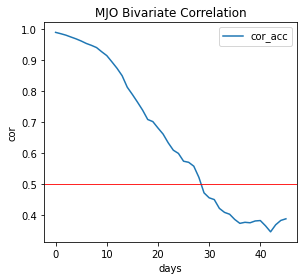

In [34]:
ec_spring_cor = cor_caluate(ec_data_spring, re_data_spring, 46)
cor_acc(ec_spring_cor)

[0.98615758 0.98284136 0.97741082 0.96906361 0.95865128 0.94461557
 0.9310803  0.9105785  0.89029363 0.87223706 0.84947672 0.83033626
 0.81317933 0.79080666 0.77042737 0.74651022 0.72627215 0.6951075
 0.67291108 0.65308938 0.62678179 0.60833011 0.59948741 0.58953366
 0.57047086 0.55868476 0.54879479 0.53485484 0.51549122 0.50669846
 0.49615325 0.49324506 0.47533059 0.44828614 0.42853697 0.4180533
 0.41812337 0.40515658 0.39676257 0.38391141 0.37473277 0.35889941
 0.34973749 0.34039536 0.32246194 0.31081162]


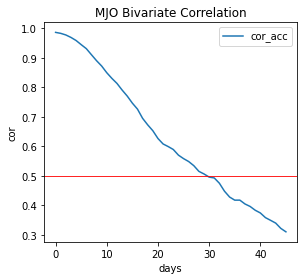

In [35]:
ec_summer_cor = cor_caluate(ec_data_summer, re_data_summer, 46)
cor_acc(ec_summer_cor)

[0.98336354 0.98005983 0.97656586 0.97087511 0.9624041  0.95276684
 0.93987174 0.92499544 0.90871695 0.8931184  0.87761891 0.86362966
 0.84672076 0.83130664 0.81411539 0.79237024 0.77203479 0.75619632
 0.74317551 0.73105364 0.71580643 0.70663371 0.69490835 0.67716151
 0.6584003  0.64087493 0.62859914 0.61158657 0.59782227 0.58724109
 0.57743293 0.56546439 0.54954904 0.53396049 0.52169539 0.51122709
 0.49819026 0.47494515 0.46697869 0.45178477 0.43255853 0.4115521
 0.40120138 0.39447111 0.3813751  0.37272642]


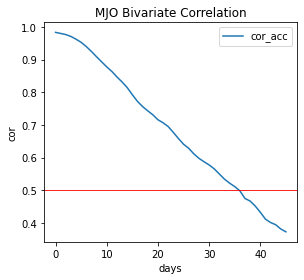

In [36]:
ec_autumn_cor = cor_caluate(ec_data_autumn, re_data_autumn, 46)
cor_acc(ec_autumn_cor)

[0.98776149 0.98443853 0.98061728 0.97777016 0.9738123  0.96571166
 0.95867981 0.94713469 0.93738157 0.92524399 0.90866846 0.89148834
 0.87900466 0.86043871 0.84003215 0.81951993 0.79727844 0.76823727
 0.74303169 0.72368465 0.70088542 0.67920499 0.64672763 0.62841881
 0.60065381 0.57912051 0.56082272 0.54073911 0.52246023 0.49493132
 0.47754576 0.46313512 0.44958578 0.43418048 0.41651197 0.39372134
 0.3721586  0.35216193 0.34044599 0.33091586 0.32442808 0.3085394
 0.29416315 0.26825787 0.24300786 0.22847785]


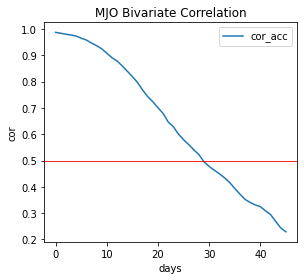

In [37]:
ec_winter_cor = cor_caluate(ec_data_winter, re_data_winter, 46)
cor_acc(ec_winter_cor)

In [38]:
pred_data = np.load('/WdHeDisk/users/zhangnong/MJO/913_test/data/pred_data.npy')
re_data = np.load('/WdHeDisk/users/zhangnong/MJO/913_test/data/re_data.npy')

In [39]:
print(pred_data.shape)
print(re_data.shape)

(400, 35, 2)
(400, 35, 2)


In [40]:
pred_spring = pred_data[0:100]
re_spring = re_data[0:100]

pred_summer = pred_data[0:300]
re_summer = re_data[0:300]

pred_autumn = pred_data[0:400]
re_autumn = re_data[0:400]

pred_winter = pred_data[0:200]
re_winter = re_data[0:200]

[0.88480888 0.8614447  0.82905138 0.78988067 0.74235844 0.70824982
 0.69957795 0.66920882 0.64927243 0.64588716 0.64515199 0.65410612
 0.66065392 0.65951803 0.65412145 0.62601055 0.61192464 0.61641481
 0.61593245 0.60168005 0.58415986 0.57964179 0.56750428 0.5514347
 0.53886708 0.52312814 0.50969865 0.50680396 0.48360515 0.45073974
 0.42520374 0.41096577 0.40553795 0.40227353 0.39306358]


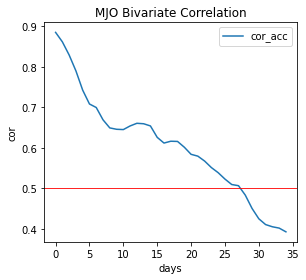

In [41]:
p_spring_cor = cor_caluate(pred_spring, re_spring, 35)
cor_acc(p_spring_cor)

[0.88401603 0.85464534 0.8262347  0.78687268 0.74088742 0.70627847
 0.67611961 0.6437693  0.62016807 0.61334117 0.61071977 0.60373125
 0.59269232 0.5896193  0.58538219 0.57410963 0.56795564 0.56367436
 0.55757311 0.5486852  0.54365668 0.54112768 0.53000779 0.5184107
 0.5054804  0.48766811 0.47325269 0.45757506 0.43664846 0.42327109
 0.4114817  0.40387991 0.38672887 0.37562838 0.36600227]


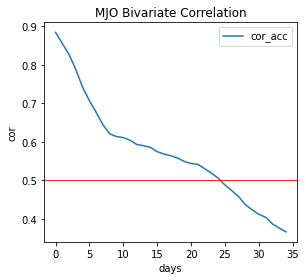

In [42]:
p_summer_cor = cor_caluate(pred_summer, re_summer, 35)
cor_acc(p_summer_cor)

[0.88285856 0.85536634 0.82615825 0.78865028 0.74526353 0.70215008
 0.67194183 0.63845732 0.6118105  0.59941806 0.5966205  0.59164084
 0.58442343 0.58123165 0.57916196 0.5727146  0.56684553 0.56021366
 0.55485574 0.54916428 0.54486642 0.54195063 0.52962519 0.51818577
 0.50231904 0.48265485 0.46616716 0.45057601 0.42963829 0.4167315
 0.40984186 0.40177543 0.38737242 0.37950817 0.36764148]


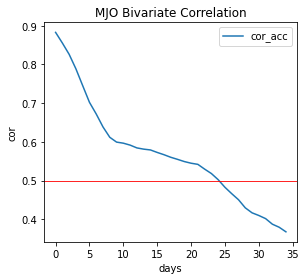

In [43]:
p_autumn_cor = cor_caluate(pred_autumn, re_autumn, 35)
cor_acc(p_autumn_cor)

[0.87802631 0.84728208 0.81616548 0.77601862 0.72964497 0.69408712
 0.66906812 0.63584139 0.61377611 0.61388649 0.60809668 0.61011883
 0.60631766 0.60515725 0.59985573 0.58843815 0.5805486  0.57362024
 0.57174868 0.56136026 0.55736349 0.55782642 0.54574262 0.52964943
 0.509411   0.49304136 0.47603561 0.46320685 0.4373563  0.41776011
 0.40228722 0.38476045 0.36829895 0.35913772 0.34944026]


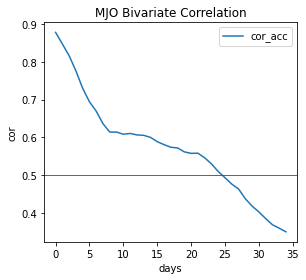

In [44]:
p_winter_cor = cor_caluate(pred_winter, re_winter, 35)
cor_acc(p_winter_cor)

In [45]:
print(ec_spring_cor)

[0.98845597 0.98423594 0.97956859 0.97348591 0.96755829 0.96067648
 0.95278933 0.94670324 0.93956901 0.92620155 0.91373444 0.89365654
 0.87295961 0.84900301 0.81205379 0.78868971 0.76399923 0.73825422
 0.70815299 0.70136702 0.68080942 0.66124776 0.63322349 0.60937473
 0.59901119 0.57393139 0.5703885  0.55788334 0.52183083 0.47213566
 0.456178   0.45048114 0.42215881 0.40931488 0.40333687 0.38653032
 0.37397183 0.37738762 0.37586886 0.3816683  0.3829805  0.36626234
 0.34672105 0.36942419 0.38338808 0.38862644]


[0.23085452 0.27256284 0.32782901 0.38097301 0.42742219 0.47333851
 0.5270678  0.58183466 0.62418684 0.6813719  0.73658513 0.79354493
 0.84491444 0.90486832 0.97418082 1.00279981 1.0272479  1.06295536
 1.08195514 1.06092873 1.07319015 1.08702329 1.08470285 1.08802959
 1.08074598 1.07552518 1.0720771  1.08734007 1.11663402 1.16860936
 1.18991789 1.19898433 1.24066255 1.27418486 1.29644252 1.32902481
 1.35211746 1.38201364 1.39032152 1.39565748 1.39563932 1.41896616
 1.43036768 1.418297   1.42691365 1.40804089]


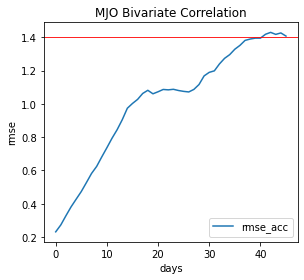

In [46]:
ec_spring_rmse = rmse_caluate(ec_data_spring, re_data_spring, 46)
rmse_acc(ec_spring_rmse)

[0.20093882 0.22290533 0.25484664 0.29300209 0.34162022 0.39230936
 0.43718096 0.49571788 0.54471219 0.587683   0.63339858 0.6794198
 0.70324649 0.73587037 0.76766405 0.79848709 0.82588944 0.84743511
 0.87572308 0.89285747 0.91406221 0.92306655 0.92962905 0.93870739
 0.95110085 0.96846045 0.97952323 0.99154314 1.0102465  1.01672679
 1.02386551 1.02632579 1.04510775 1.06228055 1.07205227 1.07683207
 1.0703376  1.0790443  1.0771047  1.0853957  1.09247745 1.10722982
 1.11902704 1.12123594 1.13871454 1.15668504]


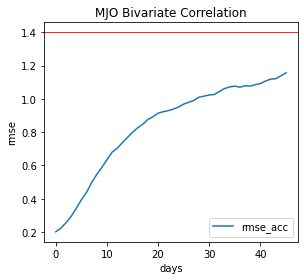

In [47]:
ec_summer_rmse = rmse_caluate(ec_data_summer, re_data_summer, 46)
rmse_acc(ec_summer_rmse)

[0.24081479 0.26651043 0.29106324 0.32687295 0.37257735 0.42124679
 0.47145563 0.52245713 0.58005196 0.62172759 0.66545805 0.69994486
 0.74366967 0.771234   0.80381274 0.850055   0.88114552 0.9149113
 0.9368268  0.96311624 0.9794586  0.99710206 1.01950396 1.03791965
 1.06598435 1.08998496 1.11170934 1.12298497 1.14237875 1.1612935
 1.17000875 1.18375505 1.20151806 1.22585145 1.22542966 1.23480102
 1.25680532 1.27433064 1.28607411 1.29943889 1.32233339 1.32689635
 1.33507496 1.34860659 1.35685804 1.36143083]


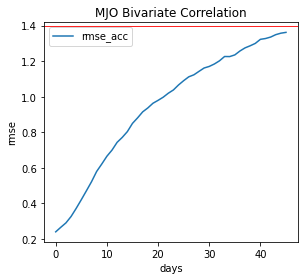

In [48]:
ec_autumn_rmse = rmse_caluate(ec_data_autumn, re_data_autumn, 46)
rmse_acc(ec_autumn_rmse)

[0.23301167 0.26558588 0.30414009 0.33391248 0.36434305 0.41864406
 0.45193971 0.50927932 0.55712512 0.61459159 0.66638    0.72670468
 0.77058818 0.81372566 0.87039145 0.92050448 0.97108693 1.03307217
 1.07699768 1.11236072 1.13678499 1.16782882 1.22371757 1.25375702
 1.28003256 1.29350653 1.30976446 1.32200335 1.33274567 1.36522106
 1.39459234 1.40888774 1.41532208 1.43307021 1.44753891 1.46591341
 1.48919874 1.50110982 1.49862423 1.51120008 1.51813836 1.52964471
 1.53656417 1.55199049 1.57287879 1.57083979]


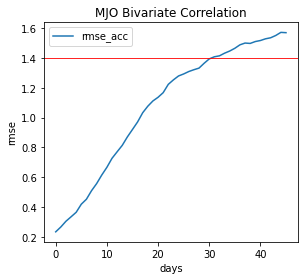

In [49]:
ec_winter_rmse = rmse_caluate(ec_data_winter, re_data_winter, 46)
rmse_acc(ec_winter_rmse)

In [50]:
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_spring_cor.npy', ec_spring_cor)
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_spring_rmse.npy', ec_spring_rmse)

np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_summer_cor.npy', ec_summer_cor)
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_summer_rmse.npy', ec_summer_rmse)

np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_autumn_cor.npy', ec_autumn_cor)
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_autumn_rmse.npy', ec_autumn_rmse)

np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_winter_cor.npy', ec_winter_cor)
np.save('/WdHeDisk/users/zhangnong/MJO/711_test(the most important)/season_ec_re_rmm/ec_winter_rmse.npy', ec_winter_rmse)
